In [1]:
import pandas as pd
import numpy as np
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from pretty_confusion_matrix import pp_matrix

2023-04-17 11:43:32.774864: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Versions of Packages**

In [2]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Scikit-learn version:", sklearn_version)
print("TensorFlow version:", tf.__version__)
#unable to find the version for pretty_conf_matrix, but maybe only one of us runs it?

Pandas version: 1.4.4
NumPy version: 1.21.5
Scikit-learn version: 1.0.2
TensorFlow version: 2.10.0


In [4]:
#import pre-processed data from pickle 
year = "2010"
file_path = "/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/"
file_path_2 = "_final_rnn.pickle"

df_10= pd.read_pickle(file_path + year + file_path_2)
#df_09= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2009_text_wo_names.pickle")
#df_11= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2011_text_wo_names.pickle")
#df_12= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2012_text_wo_names.pickle")
#df_13= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2013_text_wo_names.pickle")
#df_14= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2014_text_wo_names.pickle")
#df_15= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2015_text_wo_names.pickle")
#df_16= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2016_text_wo_names.pickle")
#df_17= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2017_text_wo_names.pickle")
#df_18= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2018_text_wo_names.pickle")
#df_19 = pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2019_text_wo_names.pickle")
#df_20 = pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2020_text_wo_names.pickle")
#df_21 = pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2021_text_wo_names.pickle")
#df_22 = pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2022_text_wo_names_(1).pickle")
df_10

,pre_processed_sent,string_rnn,male_count,female_count,Proper_noun_list,pn exists,sentences,article_id,year,col_type
0,"[say, delight, restored, bridge, back, use]",say delight restored bridge back use,1,0,[Southease],None,"Chairman of Southease Parish, Neville Harrison...",1,2010,0
1,"[family, year, old, kill, house, fire, pay, tr...",family year old kill house fire pay tribute br...,0,2,[],None,The family of a 34-year-old mother from Bristo...,21,2010,1
2,"[family, say, kind, totally, dedicated]",family say kind totally dedicated,1,4,[],None,Her family said she was kind and a totally ded...,21,2010,1
3,"[truly, tragic, love, family, everything, give...",truly tragic love family everything give famil...,0,4,[Sara],None,"'Truly tragic'""Sara loved her family above eve...",21,2010,1
4,"[everybody, know, love, miss, always]",everybody know love miss always,0,3,[],None,"""Everybody who knew her will love her and miss...",21,2010,1
...,...,...,...,...,...,...,...,...,...,...
514542,"[contrast, news, conference, sound, guard, eve...",contrast news conference sound guard even slig...,2,0,[Fabio],None,Compare and contrast - Fabio Capello's news co...,2175804,2010,0
514543,"[goal, one, chosen, five, could, take, spot, k...",goal one chosen five could take spot kick need,2,0,"[Nelson, Mandela]",True,And after his goal at the Nelson Mandela Bay S...,2175804,2010,0
514544,"[everyone, practise, say]",everyone practise say,1,0,[],None,"""Everyone has been practising them,"" he said.",2175804,2010,0
514545,"[look, relax, hair, back, cornrows, mobile, tu...",look relax hair back cornrows mobile tuck righ...,4,0,[],None,"He looked relaxed, his hair back in cornrows, ...",2175804,2010,0


In [5]:
def absolute_count(male_col, female_col):
    if female_col > male_col and male_col == 0:
        return 1
    elif male_col> female_col and female_col ==0: 
        return 0
    else: 
        return None

In [6]:
#apply function to only get rows with an absolute count 
df_10['col_type'] = df_10.apply(lambda row: absolute_count(row['male_count'], row['female_count']),axis=1)

#remove nulls 
df_10 = df_10[df_10["col_type"].notnull()]

#DOC: number of male and female columns
df_10["col_type"].value_counts()  

0.0    378476
1.0    113870
Name: col_type, dtype: int64

**Split the DF**

In [7]:
# Split the df by the preprocessed 
x_train, x_test, y_train, y_test = train_test_split(df_10["pre_processed_sent"], 
                                                    df_10["col_type"], 
                                                    stratify = df_10["col_type"])

In [8]:
xTrain, xTest, yTrain, yTest = train_test_split(df_10["string_rnn"],
                                                df_10["col_type"], 
                                                stratify = df_10["col_type"])

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((xTrain, yTrain)) #string_rnn here 
test_dataset = tf.data.Dataset.from_tensor_slices((xTest, yTest)) #clean text 
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [10]:
for example, gen_label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', gen_label.numpy())

text:  b'police identify year old kill crash borders weekend lanarkshire'
label:  0.0


In [11]:
buffer_size = 50000 #
batch_size = 64 # best practice
train_dataset = train_dataset.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [12]:
#map text features to integer sequences for all of the vocabulary
vocab_size = 50000 #this is 1/12 of all the words in the english language 
encoder = tf.keras.layers.TextVectorization(
    max_tokens=vocab_size)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [13]:
vocab = np.array(encoder.get_vocabulary())
vocab_dict = dict(enumerate(vocab))
#vocab_dict

**RNN/LSTM Architecture**

In [61]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2)
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 64)          2752000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                        

In [70]:
def calculate_pos_weight(labels):
    """Calculate the positive class weight for an imbalanced dataset."""
    num_pos = np.sum(labels == 1)
    num_neg = np.sum(labels == 0)
    total = num_pos + num_neg
    pos_weight = (total - num_pos) / num_pos
    return pos_weight
pos_weight = calculate_pos_weight(train_dataset)

In [72]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [73]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [66]:
history = model.fit(train_dataset, epochs=1,
                    validation_data=test_dataset)

5770/5770 [==============================] - 197s 33ms/step - loss: 0.5015 - accuracy: 0.7797 - val_loss: 0.4742 - val_accuracy: 0.7881


In [ ]:
#type(test_dataset)

**Confusion Matrix**

In [84]:
# Convert y_true and y_pred to numpy arrays
y_true = np.concatenate([y.numpy() for _, y in test_dataset], axis=0)
y_pred = np.concatenate([model.predict(x).argmax(axis=-1) for x, _ in test_dataset], axis=0)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

#define the positive class as the female class 
positive_class =1 

#define counts for each element of confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels = [0, positive_class]).ravel()
results_cm = {' ': ['True Negative', 'False Positive', 'False Negative', 'True Positive'],
           'Counts': [tn, fp, fn, tp]}

df_cm = pd.DataFrame(results_cm)
df_cm.set_index(' ', inplace=True)
print(df_cm)


1/1 [==============================] - 2s 2s/step
                Counts
                      
True Negative    91684
False Positive    2935
False Negative   23150
True Positive     5318


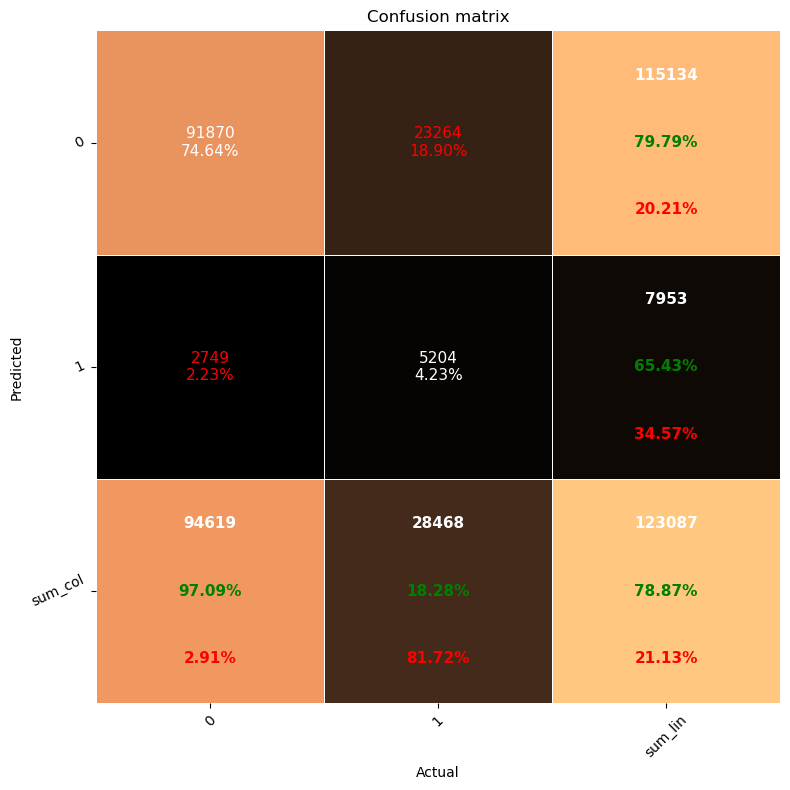

In [33]:
#make a cute confusion matrix 
data = pd.DataFrame(cm)
cmap = 'copper' #to change palette, look up cmap palettes
pp_matrix(data, cmap=cmap)

**Coefficient Analysis**

In [36]:
model.layers #6 is the Dense layer 

In [45]:
model.layers[0].get_weights()

64

In [50]:
# Get the feature weights
weights = model.layers[1].get_weights()[0] #1 is what we have been using so farfor layers

# Sort the feature weights
sorted_weights = np.sort(weights, axis=0)[::-1]

# Select the top 1000 features
top_features = sorted_weights[:1000]

# Select the bottom 1000 features
bottom_features = sorted_weights[-1000:]

vocab_dict = dict(enumerate(vocab))

# Map the features back to words
#top_words = [word for word, idx in sorted(vocab_dict.items(), key=lambda x: weights[int(x[1])] if (x[1] != "" and x[0] != "[UNK]") else 0, reverse=True)[:1000]]
#bottom_words = [word for word, idx in sorted(vocab_dict.items(), key=lambda x: weights[int(x[1])] if x[1] != "" and x[0] != "[UNK]" else 0, reverse=False)[:1000]]

top_words = vocab[np.argsort(weights[:,::-1])[:1000]]
bottom_words = vocab[np.argsort(weights)][:1000]


# Print the top and bottom features
print("Top features:")#, top_words, type(top_features))
s1h = pd.Series(top_words.ravel(), name='words') #ravel() to flatten 
s2h= pd.Series(top_features.ravel(), name='weights')
df_high = pd.concat([s1h, s2h], axis = 1)
#df_high

print("Bottom features:")#, top_words, type(top_features))
s1l = pd.Series(bottom_words.ravel(), name='words') #ravel() to flatten 
s2l= pd.Series(bottom_features.ravel(), name='weights')
df_low = pd.concat([s1l, s2l], axis = 1)
df_high

Top features:
Bottom features:


,words,weights
0,believe,0.144649
1,way,0.105769
2,get,0.106442
3,give,0.096965
4,would,0.097655
...,...,...
63995,way,0.046510
63996,month,0.046632
63997,one,0.046664
63998,death,0.046781


In [51]:
#sort highest
df_sorted_h = df_high.sort_values(by = "weights", ascending=False)
df_sorted_h.head(50)

,words,weights
37,time,0.154719
15,back,0.152896
57,work,0.150518
59,child,0.149235
0,believe,0.144649
53,old,0.140124
51,think,0.136892
6,could,0.135321
54,two,0.127488
9,,0.127343


In [52]:
#sort lowest
df_sorted_l = df_low.sort_values(by = "weights", ascending=True)
df_sorted_l.head(50)

,words,weights
63994,hospital,-0.155944
63953,could,-0.148462
63955,arrest,-0.147397
63952,[UNK],-0.145402
63937,show,-0.141941
63986,way,-0.136432
63947,child,-0.134017
63977,work,-0.131057
63943,go,-0.130461
63946,,-0.128992


**Word Cloud**

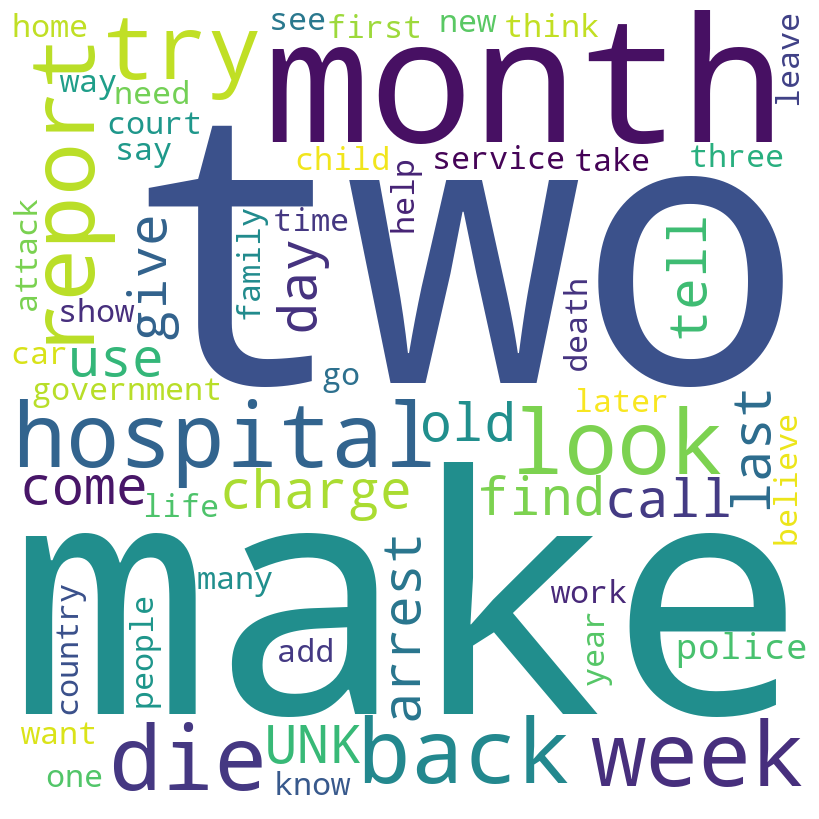

In [53]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df_low['words'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Code with Attention Mechanism**

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2)
])

In [59]:

# Define the input layer
inputs = tf.keras.Input(shape=(1,), dtype=tf.string)

# Encode the input text using the encoder layer
x = encoder(inputs)

# Define the embedding layer
embedding = tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True)(x)

# Define the first LSTM layer
lstm1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(embedding)

# Define the attention layer
attention = tf.keras.layers.Attention()([lstm1, lstm1])

# Define the second LSTM layer
lstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))(attention)

# Define the dense output layer
dense = tf.keras.layers.Dense(64, activation='relu')(lstm2)

# Define the dropout layer
dropout = tf.keras.layers.Dropout(0.5)(dense)

# Define the final output layer
outputs = tf.keras.layers.Dense(2)(dropout)

# Define the model
model1 = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [60]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, None)        0           ['input_2[0][0]']                
 ization)                                                                                         
                                                                                                  
 embedding_4 (Embedding)        (None, None, 64)     2749760     ['text_vectorization[4][0]']     
                                                                                                  
 bidirectional_8 (Bidirectional  (None, None, 128)   66048       ['embedding_4[0][0]']      